# Difference between Old and New "getD" function
In "supernovaNuBoostedDM" package, the equation we used took the form as
\begin{equation}
    D^2=d^2+R_{star}^2-2dR_{star}\cos{\theta}
\end{equation}
Although this function is correct mathematically, such expresion may not work quite well when facing float in computer world since we may have of face the circumstances that $d^2+R_{star}^2\approx2dR_{star}\cos{\theta}$ when $\theta\to0$ and that $d=R_{star}$.  For such extreme case, we may easy get wrong (or even negative) value on $D$ owing to the structure of float.
Therefore, it may be a better choice for use to rewrite the equation into the form as
\begin{equation}
    D^2=\left(d-R_{star}\right)^2+4dR_{star}\cos^2{\left(\frac{\theta}{2}\right)}
\end{equation}
via using trigonometric identity.  By doing so, we will always get positive value, and the result we get will become more accurate in extreme cases.

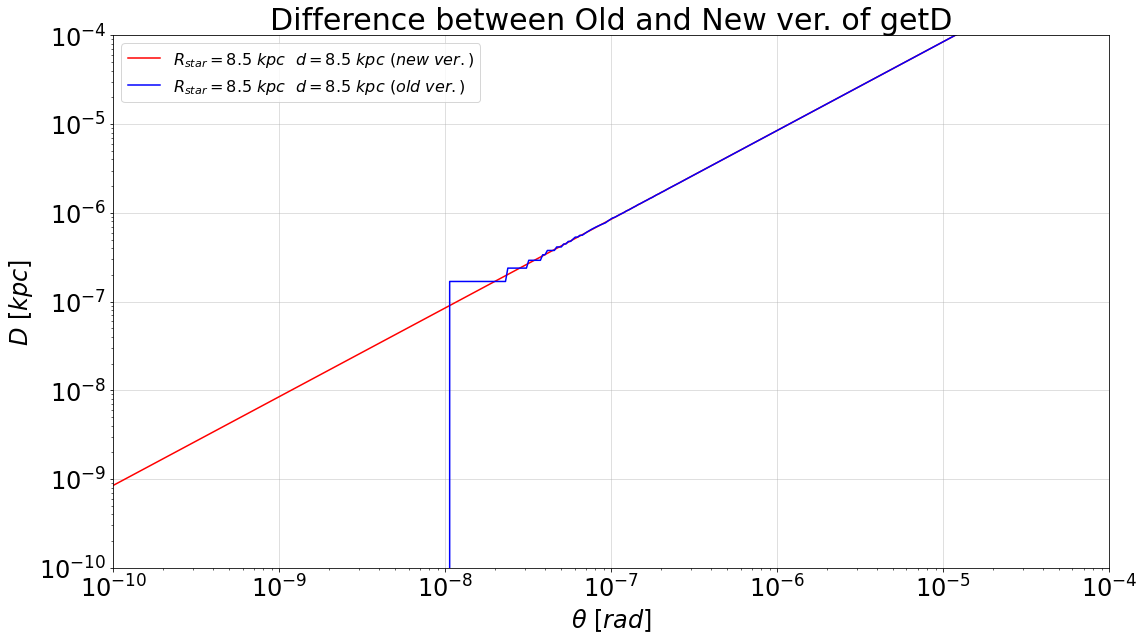

In [2]:
import supernovaNuBoostedDM as s1
import SNNuBDM as s2
import numpy as np
import matplotlib.pyplot as plt

D = np.zeros((2,1000))
d = 8.5
Rstar = 8.5
theta = np.logspace(-14,0,num=1000, base=10)


for i in range(1000):
    D[0,i] = s1.getD(d,Rstar,theta[i])
for i in range(1000):
    D[1,i] = s2.getD(d,Rstar,theta[i])

Fig = plt.figure()
plt.plot(theta, D[1, :], color='r', linestyle='-', label=r'$R_{star}=8.5\ kpc\ \ d=8.5\ kpc\ (new\ ver.)$')
plt.plot(theta, D[0, :], color='b', linestyle='-', label=r'$R_{star}=8.5\ kpc\ \ d=8.5\ kpc\ (old\ ver.)$')
plt.legend(loc='best')
plt.title('Difference between Old and New ver. of getD',fontsize=30)
plt.xscale("log", base=10)
plt.xlim(1e-10, 1e-4)
plt.yscale("log", base=10)
plt.ylim(1e-10, 1e-4)
plt.tick_params(labelsize=24)
plt.legend(fontsize=16)
plt.grid(alpha=0.5)
Fig.set_size_inches(16, 9)
plt.xlabel(r'$\theta\ [rad]$', fontsize=24)
plt.ylabel(r'$D\ [kpc]$', fontsize=24)
plt.tight_layout()
plt.savefig('test_getD_1.png')
plt.savefig('test_getD_1.jpg')
plt.show()